In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
DIR = '../data/'

In [4]:
# read the json file domain1_train.json in to the system
train_domain1 = pd.read_json('data/domain1_train.json', lines=True)

In [5]:
train_domain1.head(10)

,text,label
0,"[70, 746, 825, 109, 2083, 0, 2, 0, 0, 0, 9, 0,...",1
1,"[1209, 179, 1952, 4, 4959, 7, 0, 2, 978, 1522,...",1
2,"[287, 3, 3330, 0, 23, 12, 13, 465, 74, 8, 0, 8...",1
3,"[0, 0, 3, 592, 19, 2, 706, 1439, 2575, 7, 2, 0...",1
4,"[9, 2, 110, 12, 42, 32, 44, 361, 9, 3860, 2358...",1
5,"[9, 892, 3, 0, 0, 3, 2, 0, 811, 3, 26, 939, 13...",1
6,"[0, 1115, 0, 72, 192, 64, 31, 3295, 33, 0, 1]",1
7,"[2, 1510, 0, 9, 30, 138, 118, 2, 0, 0, 0, 5, 0...",1
8,"[0, 1398, 324, 41, 1629, 0, 4162, 0, 4, 3020, ...",1
9,"[9, 5, 940, 4, 394, 3, 2, 537, 8, 15, 773, 3, ...",1


In [6]:
train_domain1['label'].value_counts(dropna=False)

1    9750
0    9750
Name: label, dtype: int64

<Axes: ylabel='Frequency'>

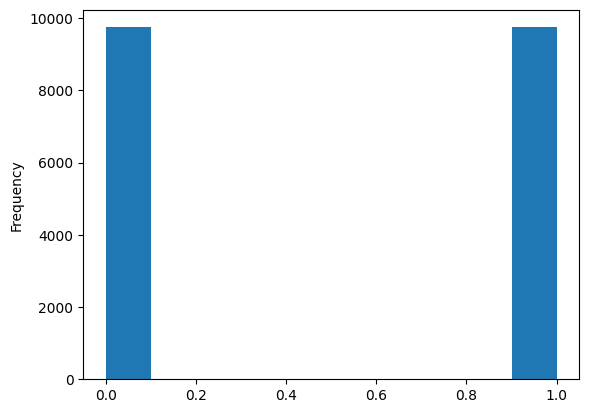

In [8]:
train_domain1['label'].plot.hist()

In [9]:
text1_length = train_domain1['text'].apply(len)
text1_length.describe()

count    19500.000000
mean        39.765282
std         31.248784
min          1.000000
25%         19.000000
50%         29.000000
75%         47.000000
max        238.000000
Name: text, dtype: float64

In [10]:
# read the json file domain2_train.json in to the system
train_domain2 = pd.read_json('data/domain2_train.json', lines=True)

In [11]:
train_domain2.head(10)

,text,label,model
0,"[3147, 471, 4, 343, 2, 0, 1, 14, 124, 133, 436...",1,NaN
1,"[10, 389, 232, 24, 2, 0, 4730, 1, 13, 10, 129,...",1,NaN
2,"[861, 0, 2505, 2, 0, 1015, 2, 0, 3, 1772, 8, 3...",1,NaN
3,"[325, 21, 3234, 1, 14, 187, 16, 13, 1965, 1, 1...",1,NaN
4,"[5, 1091, 272, 6, 3232, 32, 2, 1012, 4, 3240, ...",1,NaN
5,"[10, 410, 36, 3484, 8, 15, 0, 59, 36, 3484, 12...",1,NaN
6,"[503, 7, 11, 133, 4, 1, 860, 291, 10, 5, 0, 21...",1,NaN
7,"[56, 239, 4, 31, 0, 3830, 53, 90, 2, 1745, 1, ...",1,NaN
8,"[117, 191, 10, 2, 117, 69, 2, 339, 505, 465, 4...",1,NaN
9,"[10, 1345, 5, 853, 4, 21, 4815, 1, 53, 6, 5, 2...",1,NaN


In [12]:
train_domain2['label'].value_counts(dropna=False)

0    12750
1     2150
Name: label, dtype: int64

In [13]:
text2_length = train_domain2['text'].apply(len)
text2_length.describe()

count    14900.000000
mean       156.528054
std        158.577144
min          0.000000
25%         47.000000
50%        122.000000
75%        190.000000
max       1075.000000
Name: text, dtype: float64

In [15]:
train_domain2['model'].value_counts().sort_index()

0.0    2364
1.0    2357
2.0    2339
3.0    2358
4.0     789
5.0     780
6.0    1763
Name: model, dtype: int64

### Comparason between human and machine 

In [43]:
# Grouping data for Domain 1
dm1_machine, dm1_human = train_domain1[train_domain1['label'] == 0], train_domain1[train_domain1['label'] == 1]

# Grouping data for Domain 2
dm2_machine, dm2_human = train_domain2[train_domain2['label'] == 0], train_domain2[train_domain2['label'] == 1]


#### Word frequency

Domain1: 

Humen usually use first 100 word but machines use more non-conventional words. 

Human mean frequency: 55

Machine mean frequency: 113

  

Domain 2:

Similar distribution in frequency. 

Human mean frequency: 95

Machine mean frequency: 377

In [27]:
def visualize_word(domain):
    counter = Counter()
    for text in domain['text']:
        counter.update(text)
    
    token_ids = list(counter.keys())
    token_counts = list(counter.values())
    
    mean_frequency = np.mean(token_counts)
    max_frequency = max(token_counts)
    min_frequency = min(token_counts)
    
    print(f"The mean frequency of these words is {mean_frequency}")
    print(f"The max frequency of these words is {max_frequency}")
    print(f"The min frequency of these words is {min_frequency}")
    
    # Create a bar plot
    plt.figure(figsize=(8,6))
    plt.bar(token_ids, token_counts)
    plt.xlim(left=0, right=500)
    plt.xlabel("Word frequency")
    plt.title("Word Frequency Distribution")
    plt.show()


The mean frequency of these words is 55.002274607113314
The max frequency of these words is 44068
The min frequency of these words is 1


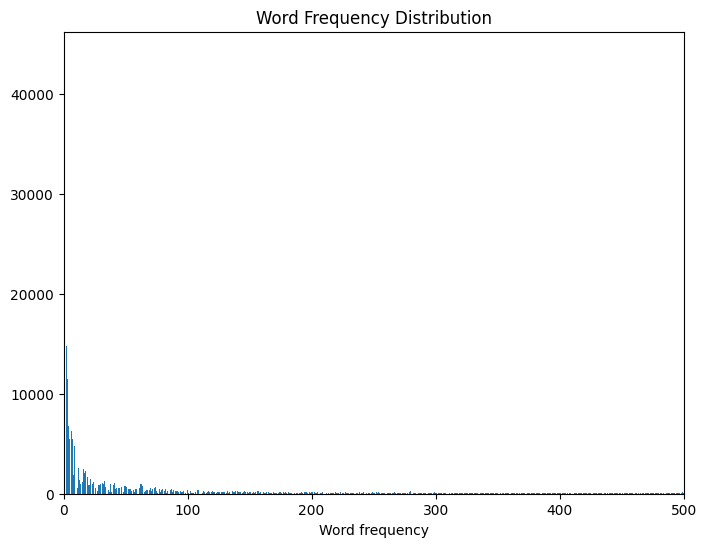

In [30]:
visualize_word(dm1_human)

The mean frequency of these words is 112.85600354452814
The max frequency of these words is 45769
The min frequency of these words is 1


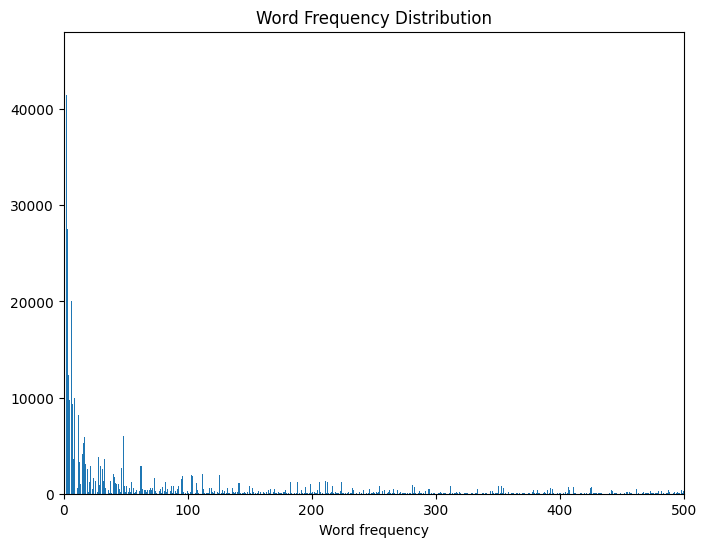

In [ ]:
visualize_word(dm1_machine)

The mean frequency of these words is 94.92816442816442
The max frequency of these words is 50768
The min frequency of these words is 1


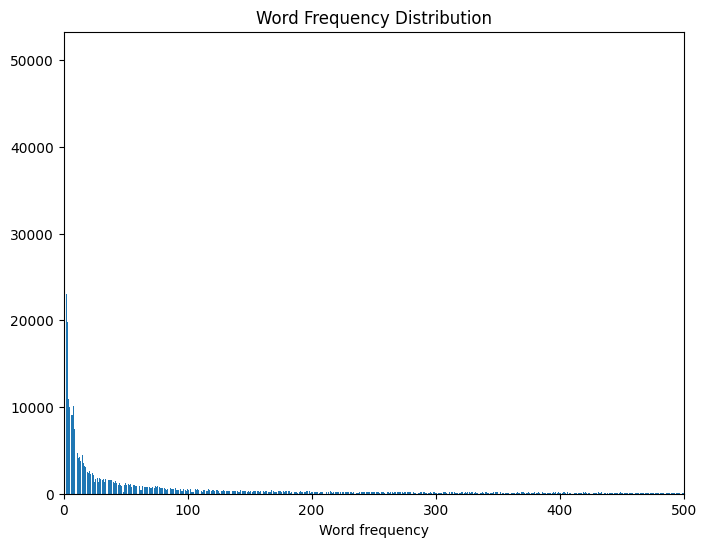

In [32]:
visualize_word(dm2_human)

The mean frequency of these words is 377.156054174247
The max frequency of these words is 146042
The min frequency of these words is 1


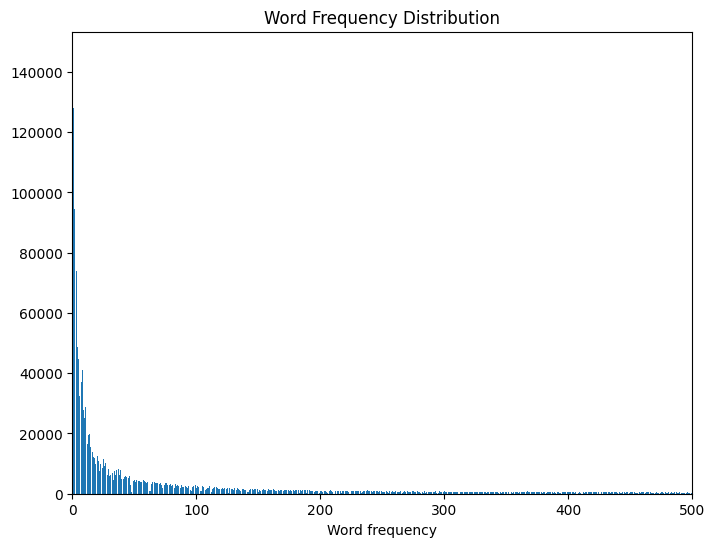

In [ ]:
visualize_word(dm2_machine)

In [40]:
def describe_text_length(domain):
    description = domain['text'].str.len().describe()
    print(description)


#### Text length

Domain 1:

Human mean text length: 27

Machine mean text length: 52



Domain 2:

Human mean text length: 217

Machine mean text length: 146

In [41]:
print("Domain 1 human")
describe_text_length(dm1_human)
print("Domain 1 machine")
describe_text_length(dm1_machine)

Domain 1 human
count    9750.000000
mean       27.281128
std        12.637503
min         9.000000
25%        18.000000
50%        25.000000
75%        34.000000
max       105.000000
Name: text, dtype: float64
Domain 1 machine
count    9750.000000
mean       52.249436
std        38.491903
min         1.000000
25%        22.000000
50%        39.000000
75%        74.000000
max       238.000000
Name: text, dtype: float64


In [42]:
print("Domain 2 human")
describe_text_length(dm2_human)
print("Domain 2 machine")
describe_text_length(dm2_machine)

Domain 2 human
count    2150.000000
mean      216.966047
std       212.696979
min         0.000000
25%        51.000000
50%       165.000000
75%       232.500000
max       933.000000
Name: text, dtype: float64
Domain 2 machine
count    12750.000000
mean       146.336549
std        145.058041
min          2.000000
25%         47.000000
50%        114.000000
75%        183.000000
max       1075.000000
Name: text, dtype: float64


#### log probability -> similar approach

machine的话生僻词会用的多一些，但是domain2的话情况会好一些。

In [69]:
def sum_log_probabilities(dataframe):
    log_probabilities = [0] * 5000
    text = dataframe['text']

    for sentence in text:
        sentence_length = len(sentence)
        unique_words = set(sentence)  # 获取句子中的唯一词
        
        for word in unique_words:
            term_frequency = sentence.count(word)
            log_probability = np.log(1 + (term_frequency / sentence_length))  # 使用平滑的对数概率计算方式
            
            log_probabilities[word] += log_probability
    
    plt.figure(figsize=(10,6))
    plt.bar(range(5000), log_probabilities)
    plt.xlabel('Word Index')
    plt.xlim(left=0, right=500)
    plt.ylabel('Log Probability')
    plt.title('Log Probability vs. Word Index')
    plt.show()
    
    # return log_probabilities

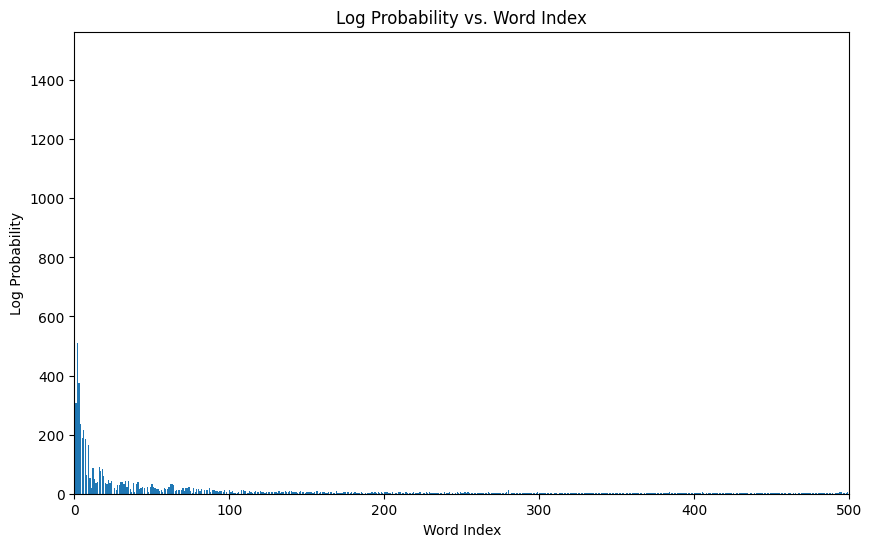

In [70]:
sum_log_probabilities(dm1_human)

In [64]:
demo1=sum_log_probabilities(dm1_human)
print(demo1)

[1489.4840635928042, 307.06895798722053, 509.98601198262276, 373.5721372856443, 235.22149194720026, 189.20380428954434, 214.48636467745257, 184.23601272942838, 64.78488333366364, 166.28164267314455, 54.30747038685832, 20.35347569683774, 85.43610111429788, 48.64542835795591, 35.76701065472114, 40.3766636040112, 90.67840751695027, 76.46613824697924, 83.65227349184364, 59.529930494264214, 35.09950657510725, 31.772249639869294, 47.77210730701086, 36.86053725761223, 43.166589535563574, 0, 18.93752431554966, 11.756476064732874, 30.844496928357774, 30.441804432240396, 38.65183750326152, 39.567159573757486, 34.42640757773988, 43.47664823755673, 21.993544286566124, 42.05228113169708, 14.309405407114559, 7.066149734963957, 36.09409398319166, 7.457976412194143, 31.455023075619383, 38.023265088488195, 17.19818142551115, 19.14441929224556, 22.015106480947754, 18.303674712697404, 0.18152200450062014, 22.408101939046837, 4.405769445967583, 23.524161067272992, 31.32096978543986, 21.42084396022818, 18.

In [65]:
max_probability = max(demo1)
max_index = demo1.index(max_probability)
print(f"The word with the highest log probability is {max_index} with a log probability of {max_probability}")

The word with the highest log probability is 0 with a log probability of 1489.4840635928042


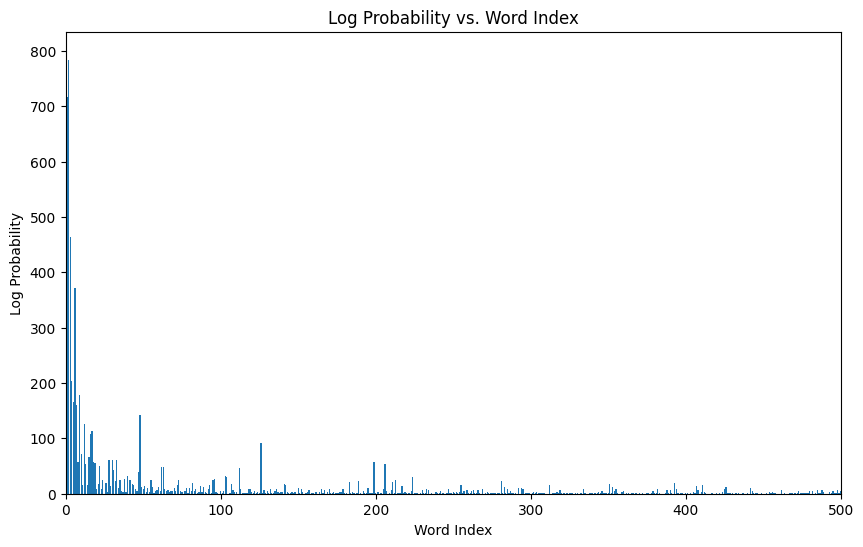

In [58]:
sum_log_probabilities(dm1_machine)

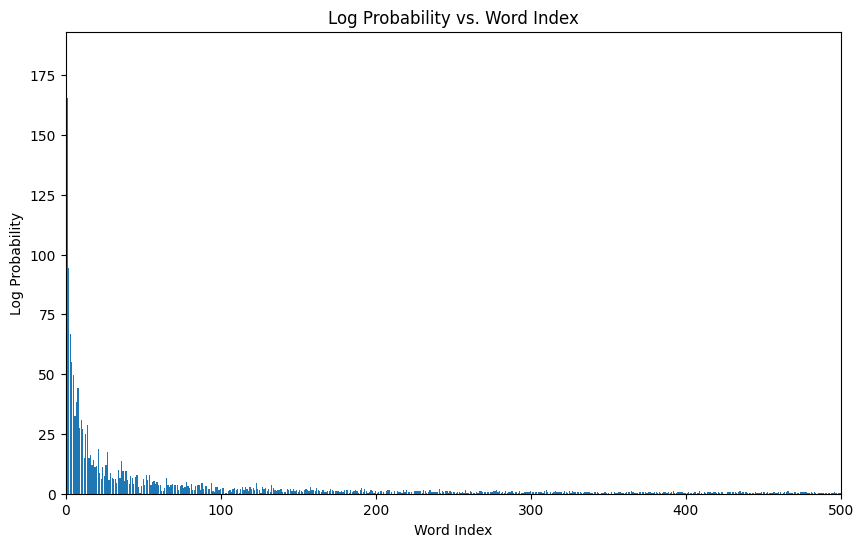

In [55]:
sum_log_probabilities(dm2_human)

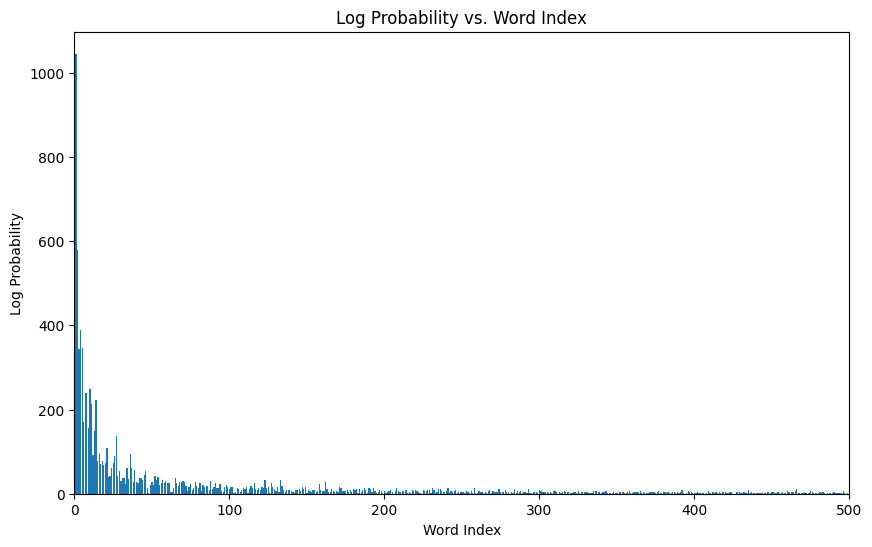

In [56]:
sum_log_probabilities(dm2_machine)

----------------------------------------------------------------------------------------

In [ ]:
# read test_set.json into the system
test = pd.read_json('data/test_set.json', lines=True)

In [ ]:
test.head(10)

,id,text
0,0,"[59, 2, 3434, 1013, 823, 2, 887, 6, 2375, 0, 3..."
1,1,"[2, 785, 6, 5, 0, 317, 17, 5, 2970, 3654, 858,..."
2,2,"[3306, 4, 2, 2288, 6, 963, 94]"
3,3,"[0, 2, 1021, 38, 126, 1, 907, 1, 761, 1, 3357,..."
4,4,"[30, 488, 197, 18, 4, 31, 420, 18, 2, 3577, 6,..."
5,5,"[0, 1041, 0, 2424, 862, 54, 63, 3048, 62, 3661..."
6,6,"[695, 4297, 16, 0, 24, 2, 2357, 549, 2785, 3, ..."
7,7,"[5, 349, 1310, 98, 17, 770, 6, 0, 4, 32, 21, 3..."
8,8,"[20, 38, 0, 2458, 3, 5, 2247, 1109, 49, 0, 706..."
9,9,"[63, 281, 62, 2349, 35, 2, 48, 6, 213, 16, 2, ..."


In [ ]:
test.describe()

,id
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


------------------------------------------------------

## Belance the data

### bag of words process

In [ ]:
# bag-of-words

# count the appearance of each word in the text
def count_word(text_list):
    count = [0] * 5000
    for token in text_list:
        count[token] += 1
    return count

# apply the count_word function to each text and store the result in a new column
def bag_of_word(df):
    df['bag_of_word'] = df['text'].apply(count_word)
    return df

##### <font color='red'>我这里认为标记了domain的model为“7”，不考虑model进去的话可以忽略</font>

In [ ]:
# manully label train_domain1's model type as "7"
train_domain1['model']=7

# apply the bag_of_word function to train_domain1
bag_train_domain1 = bag_of_word(train_domain1)
bag_train_domain1.head(10)

,text,label,model,bag_of_word
0,"[70, 746, 825, 109, 2083, 0, 2, 0, 0, 0, 9, 0,...",1,7,"[7, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, ..."
1,"[1209, 179, 1952, 4, 4959, 7, 0, 2, 978, 1522,...",1,7,"[1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[287, 3, 3330, 0, 23, 12, 13, 465, 74, 8, 0, 8...",1,7,"[6, 1, 0, 1, 2, 0, 0, 2, 4, 1, 0, 0, 1, 1, 0, ..."
3,"[0, 0, 3, 592, 19, 2, 706, 1439, 2575, 7, 2, 0...",1,7,"[3, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[9, 2, 110, 12, 42, 32, 44, 361, 9, 3860, 2358...",1,7,"[4, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, ..."
5,"[9, 892, 3, 0, 0, 3, 2, 0, 811, 3, 26, 939, 13...",1,7,"[4, 1, 3, 4, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, ..."
6,"[0, 1115, 0, 72, 192, 64, 31, 3295, 33, 0, 1]",1,7,"[3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7,"[2, 1510, 0, 9, 30, 138, 118, 2, 0, 0, 0, 5, 0...",1,7,"[13, 1, 3, 3, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,..."
8,"[0, 1398, 324, 41, 1629, 0, 4162, 0, 4, 3020, ...",1,7,"[5, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
9,"[9, 5, 940, 4, 394, 3, 2, 537, 8, 15, 773, 3, ...",1,7,"[1, 1, 2, 3, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 0, ..."


In [ ]:
bag_train_domain2 = bag_of_word(train_domain2)
bag_train_domain2.head(10)

,text,label,model,bag_of_word
0,"[3147, 471, 4, 343, 2, 0, 1, 14, 124, 133, 436...",1,NaN,"[3, 5, 2, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 3, ..."
1,"[10, 389, 232, 24, 2, 0, 4730, 1, 13, 10, 129,...",1,NaN,"[4, 4, 4, 2, 1, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, ..."
2,"[861, 0, 2505, 2, 0, 1015, 2, 0, 3, 1772, 8, 3...",1,NaN,"[84, 25, 28, 26, 12, 12, 11, 13, 15, 12, 5, 0,..."
3,"[325, 21, 3234, 1, 14, 187, 16, 13, 1965, 1, 1...",1,NaN,"[0, 5, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, ..."
4,"[5, 1091, 272, 6, 3232, 32, 2, 1012, 4, 3240, ...",1,NaN,"[12, 11, 7, 1, 3, 2, 2, 1, 0, 3, 0, 4, 1, 0, 0..."
5,"[10, 410, 36, 3484, 8, 15, 0, 59, 36, 3484, 12...",1,NaN,"[5, 4, 3, 1, 1, 2, 1, 1, 2, 0, 3, 0, 0, 4, 0, ..."
6,"[503, 7, 11, 133, 4, 1, 860, 291, 10, 5, 0, 21...",1,NaN,"[2, 5, 1, 2, 3, 4, 0, 1, 1, 1, 2, 1, 1, 1, 0, ..."
7,"[56, 239, 4, 31, 0, 3830, 53, 90, 2, 1745, 1, ...",1,NaN,"[2, 5, 4, 0, 4, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, ..."
8,"[117, 191, 10, 2, 117, 69, 2, 339, 505, 465, 4...",1,NaN,"[11, 11, 7, 1, 4, 1, 4, 8, 2, 5, 9, 13, 0, 2, ..."
9,"[10, 1345, 5, 853, 4, 21, 4815, 1, 53, 6, 5, 2...",1,NaN,"[3, 5, 1, 0, 1, 4, 1, 1, 0, 0, 2, 0, 2, 1, 2, ..."


In [ ]:
bag_train_domain2['bag_of_word'].apply(len).describe()

count    14900.0
mean      5000.0
std          0.0
min       5000.0
25%       5000.0
50%       5000.0
75%       5000.0
max       5000.0
Name: bag_of_word, dtype: float64

### Data replication

In [ ]:
# repeat the human label for multiple times

def replicate(df, multiplication):
    
    # rows with label 1
    label_1_rows = df[df['label'] == 1]
    # Replicate the rows
    replicated_df = pd.concat([label_1_rows] * (multiplication-1), ignore_index=True)
    # Concatenate the original dataframe and the replicated dataframe
    result_df = pd.concat([df, replicated_df], ignore_index=True)
    
    return result_df


<font color='red'>一半一半</font>

In [ ]:
new_df = replicate(train_domain2, 6)
new_df['label'].value_counts(dropna=False)

1    12900
0    12750
Name: label, dtype: int64

### Bootstrap

<font color='red'>从label=1的行中有放回抽取，最终达到0和1的一定比例</font>

In [ ]:
# random sample with replacement from label 1
# label_1_rate: the rate of label 1 in the sampled dataframe, should be between 0 and 1

def rated_sample(df, label_1_rate):

    sampled_label_0 = df[df['label'] == 0]
    label_0_count = len(df[df['label'] == 0])

    #calculate the number of label 1 samples
    sampled_label_1_count = int(label_1_rate * label_0_count)
    
    # random sample with replacement from label 1
    sampled_label_1 = df[df['label'] == 1].sample(n=sampled_label_1_count, replace=True)

    # concatenate the sampled label 0 and sampled label 1
    sampled_df = pd.concat([sampled_label_0, sampled_label_1])
    
    return sampled_df


In [ ]:
new_df = rated_sample(train_domain2, 0.5)
new_df['label'].value_counts(dropna=False)

label
0    12750
1    12750
Name: count, dtype: int64

In [ ]:
total_balanced_train = pd.concat([train_domain1,new_df], ignore_index=True)

In [ ]:
total_balanced_train.to_csv('data/total_balanced_train.csv')